### 1.3.2 Arithmetic Operations on Images

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [12]:
x = np.uint8([250])

In [13]:
print(x)

[250]


In [14]:
y = np.uint8([10])

In [15]:
print(y)

[10]


In [16]:
x + y

array([4], dtype=uint8)

In [17]:
cv2.add(x,y)

array([[255]], dtype=uint8)

In [24]:
img1 = cv2.imread('a1.jpg')
img2 = cv2.imread('b2.jpg')

w = 0.5

dst = cv2.addWeighted(img1, w, img2, 1-w, 0)

cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
def changeWeight(value):
    global w
    w = value / 255
    dst = cv2.addWeighted(img1, w, img2, 1-w, 0)
    cv2.imshow('dst', dst)
    

In [21]:
img1 = cv2.imread('a1.jpg')
img2 = cv2.imread('b2.jpg')
w = 0
cv2.namedWindow('dst')
cv2.createTrackbar('value','dst',0,255,changeWeight)

cv2.imshow('dst', img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
img1 = cv2.imread('b2.jpg')
img2 = cv2.imread('black.jpg')

In [69]:
def pltImage(img):
    chanel = len(img.shape)
    if chanel == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap='gray')
    plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
    plt.show()

In [48]:
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
print(rows, cols, channels)

394 700 3


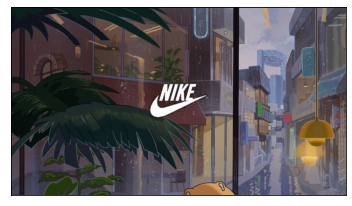

In [68]:
roi = img1[0:rows, 0:cols ]
pltImage(roi)

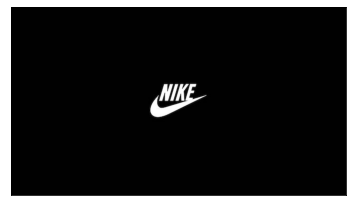

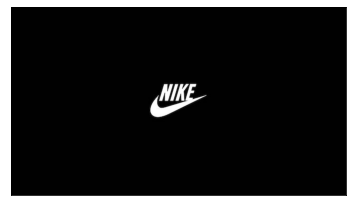

In [59]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
pltImage(img2)
pltImage(img2gray)

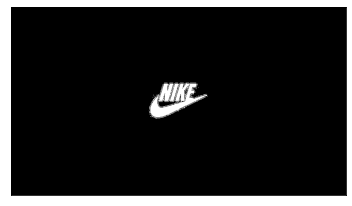

In [60]:
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
pltImage(mask)

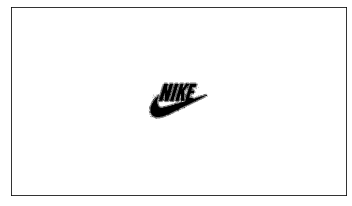

In [61]:
mask_inv = cv2.bitwise_not(mask)
pltImage(mask_inv)

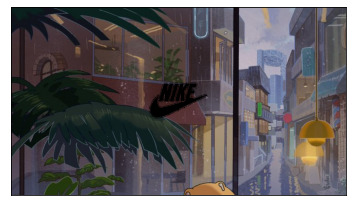

In [62]:
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
pltImage(img1_bg)

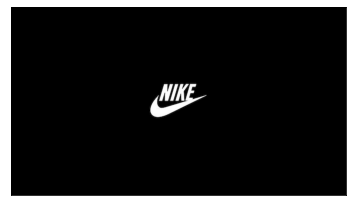

In [63]:
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
pltImage(img2_fg)

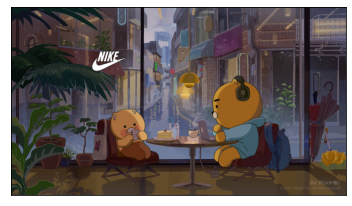

In [64]:
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
pltImage(img1)

In [56]:
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()